In [3]:
import pandas as pd
import os

In [27]:
folder_results = "results"
filename = "time_evaluation.csv"
file_path = os.path.join(results_folder, filename)

In [99]:
results = pd.read_csv(file_path, index_col=0)
print("results", results.shape)
results.head()

results (13, 9)


,Concat,NMFC,MVSpectralClustering,MVCoRegSpectralClustering,GroupPCA,AJIVE,SNF,IntNMF,COCA
simulated_gm,0.020961,0.008722,0.136859,0.106223,0.009861,NaN,0.251605,2.276073,1.502679
simulated_InterSIM,0.717047,0.099322,7.600128,0.986260,0.196125,3.310864,0.858712,19.900517,6.914983
simulated_netMUG,0.889494,0.494121,7.287392,3.353281,0.284722,7.655666,3.666835,708.112667,32.216039
nutrimouse_genotype,0.017357,0.011763,0.039772,0.105868,0.014153,0.618560,0.016609,1.325554,1.343885
nutrimouse_diet,0.011966,0.014795,0.129532,0.114987,0.101876,0.595391,0.019185,7.194951,1.809132


In [50]:
results = results[~results.eq(0).all(1)]
print("results", results.shape)
results.head()

results (12, 9)


,Concat,NMFC,MVSpectralClustering,MVCoRegSpectralClustering,GroupPCA,AJIVE,SNF,IntNMF,COCA
simulated_gm,0.020961,0.008722,0.136859,0.106223,0.009861,NaN,0.251605,2.276073,1.502679
simulated_InterSIM,0.717047,0.099322,7.600128,0.986260,0.196125,3.310864,0.858712,19.900517,6.914983
simulated_netMUG,0.889494,0.494121,7.287392,3.353281,0.284722,7.655666,3.666835,708.112667,32.216039
nutrimouse_genotype,0.017357,0.011763,0.039772,0.105868,0.014153,0.618560,0.016609,1.325554,1.343885
nutrimouse_diet,0.011966,0.014795,0.129532,0.114987,0.101876,0.595391,0.019185,7.194951,1.809132


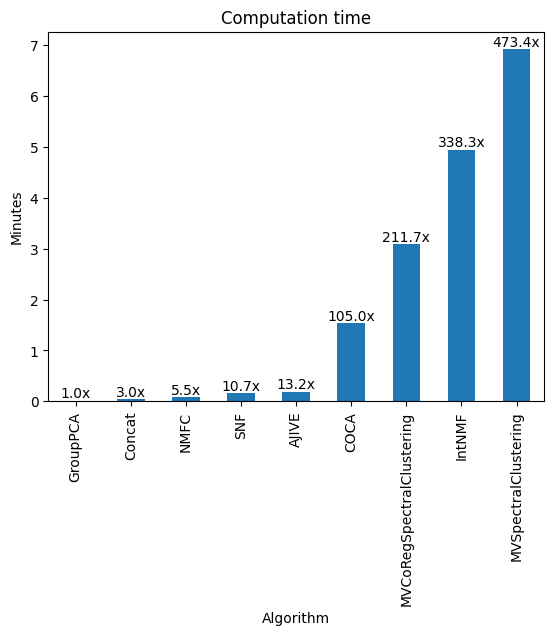

In [100]:
results_by_alg = results.mean(0).sort_values()
results_by_alg = results_by_alg / 60
ax = results_by_alg.plot.bar(title= "Computation time", xlabel= "Algorithm", ylabel= "Minutes")
labels = results_by_alg / results_by_alg.min()
labels = labels.round(1).astype(str) + "x"
_ = ax.bar_label(ax.containers[0], labels= labels)

In [103]:
results.div(60, fill_value= 0).astype(int).style.format(precision=2).set_properties(**{'text-align': 'center'}).background_gradient(cmap='RdYlGn_r', vmax= 60)

,Concat,NMFC,MVSpectralClustering,MVCoRegSpectralClustering,GroupPCA,AJIVE,SNF,IntNMF,COCA
simulated_gm,0,0,0,0,0,0,0,0,0
simulated_InterSIM,0,0,0,0,0,0,0,0,0
simulated_netMUG,0,0,0,0,0,0,0,11,0
nutrimouse_genotype,0,0,0,0,0,0,0,0,0
nutrimouse_diet,0,0,0,0,0,0,0,0,0
bbcsport,0,0,0,0,0,0,0,0,0
buaa,0,0,0,0,0,0,0,0,0
metabric,0,0,0,0,0,0,0,25,3
digits,0,0,1,0,0,0,0,0,5
bdgp,0,0,0,0,0,0,0,11,3
